# **Analyzing U.S. Hospital Charges for Chest Pain Using Boxplots in Python**

## **Step 1: Import Libbraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## **Step 2: Load the data**

In [2]:
healthcare = pd.read_csv('healthcare.csv')

In [4]:
healthcare.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


## **Step 4: Filter by diagnosis**

In [5]:
chest_pain = healthcare[healthcare['DRG Definition'] == '313 - CHEST PAIN']

## **Step 5: Filter by state - example: Alabama (AL)**

In [6]:
alabama_chest_pain = chest_pain[chest_pain['Provider State'] == 'AL']

## **Step 6: Get cost values**

In [7]:
costs = alabama_chest_pain[' Average Covered Charges '].replace('[\$,]', '', regex=True).astype(float).values

## **Step 7: Create boxplot for Alabama**

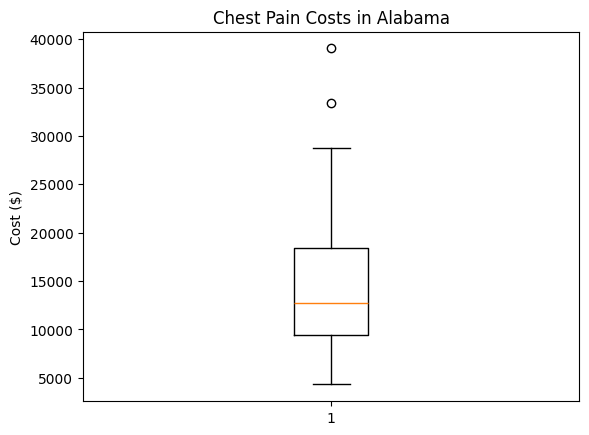

In [8]:
plt.boxplot(costs)
plt.title('Chest Pain Costs in Alabama')
plt.ylabel('Cost ($)')
plt.show()

## **Step 8: Prepare datasets for all states**

Clean cost column and get unique states

In [9]:
chest_pain[' Average Covered Charges '] = chest_pain[' Average Covered Charges '].replace('[\$,]', '', regex=True).astype(float)
states = sorted(chest_pain['Provider State'].unique())

C:\Users\zafir\AppData\Local\Temp\ipykernel_3792\1456470434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chest_pain[' Average Covered Charges '] = chest_pain[' Average Covered Charges '].replace('[\$,]', '', regex=True).astype(float)


In [10]:
datasets = []
for state in states:
    state_data = chest_pain[chest_pain['Provider State'] == state][' Average Covered Charges '].values
    datasets.append(state_data)

## **Step 9: Create wide figure and Plot all boxplots**

C:\Users\zafir\AppData\Local\Temp\ipykernel_3792\1459256975.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datasets, labels=states)


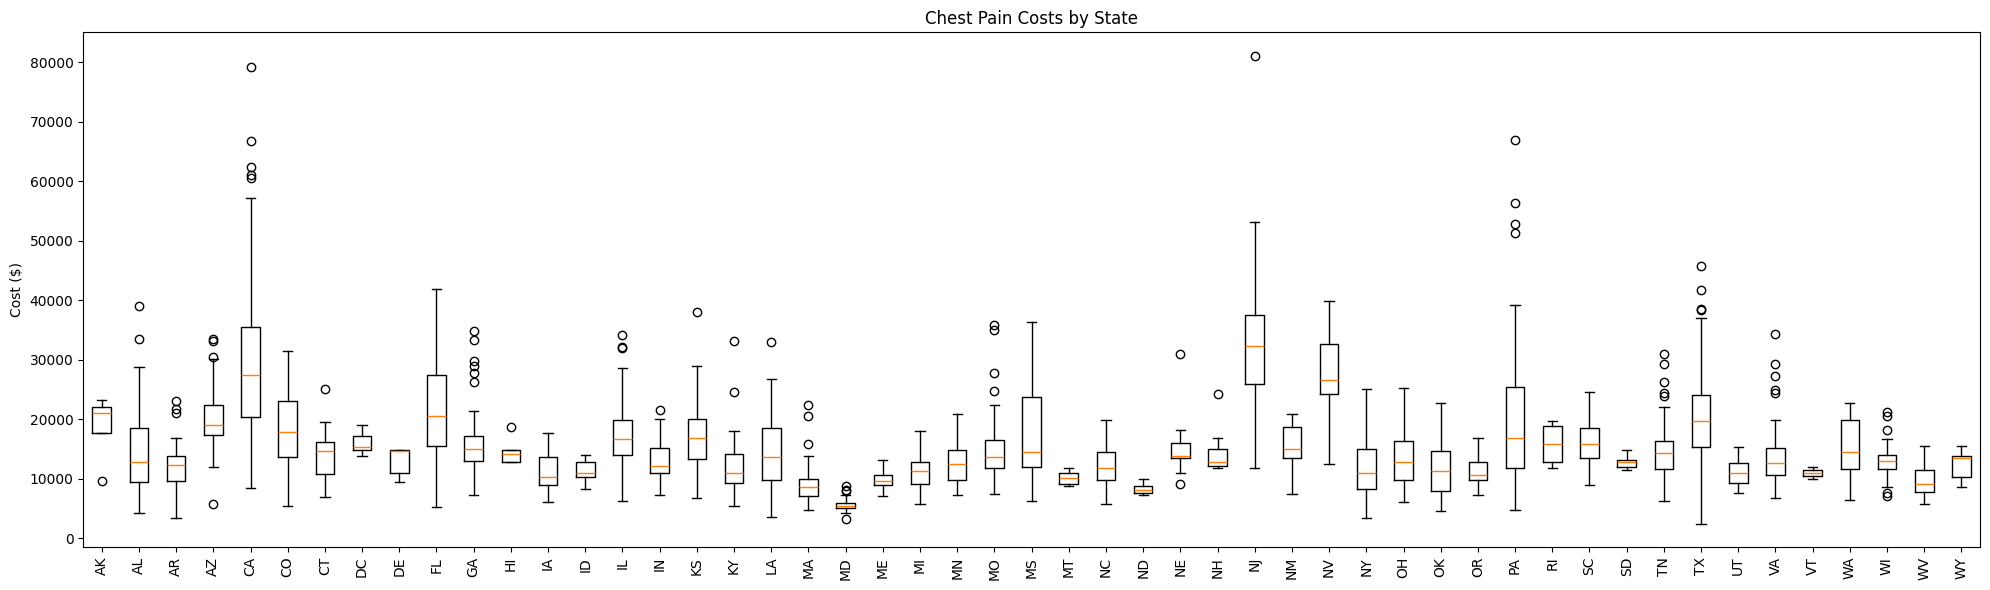

In [12]:
plt.figure(figsize=(20, 6))
plt.boxplot(datasets, labels=states)
plt.xticks(rotation=90)
plt.title('Chest Pain Costs by State')
plt.ylabel('Cost ($)')
plt.tight_layout()
plt.show()